In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import torch
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from utils import classification_results
from sklearn.metrics import confusion_matrix

In [4]:
def plot_heatmap(name, fig,  i):
    ax = fig.add_subplot(3, 4, i)
    df = pd.read_excel(f'..\\data\\result\\{name}.xlsx')

    row_order = ['DT', 'MDT', 'KNN', 'RF', 'SVM', 'SLP']
    col_order = ['STAT', 'STAT+HIST', 'GLCM', 'FEATURES']
    df = df.pivot('name', columns='properties', values='fscore') 
    df = df.reindex(col_order, axis=1)
    df = df.reindex(row_order, axis=0)
    sns.heatmap(df, annot=True, ax=ax, vmin=0.4, vmax=0.85, cbar=False)
    
    ax.set_xticklabels(['STAT', 'STAT+HIST', 'GLCM', 'ALL'], rotation=0)
    ax.set_title(name)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if i < 9:
        ax.set_xticks([])    
    if (i-1) % 4 != 0:
        ax.set_yticks([])

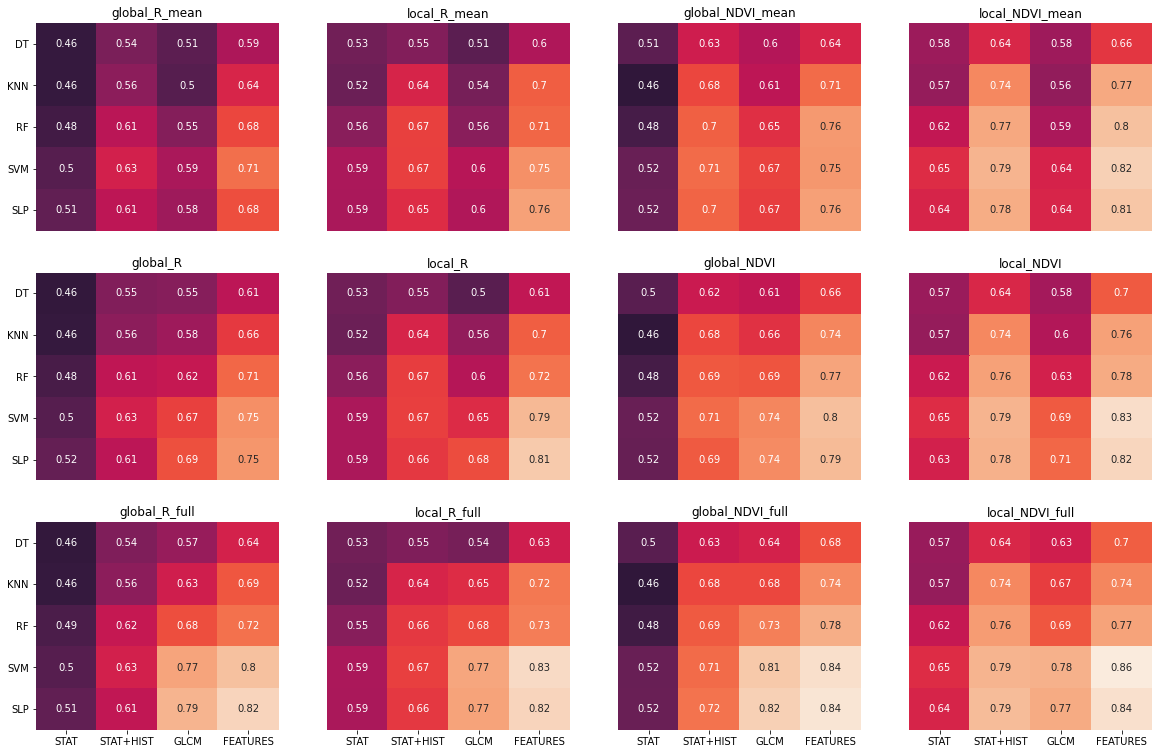

In [3]:
fig = plt.figure()
plot_heatmap('global_R_mean', fig, 1)
plot_heatmap('local_R_mean', fig, 2)

plot_heatmap('global_NDVI_mean', fig, 3)
plot_heatmap('local_NDVI_mean', fig, 4)

plot_heatmap('global_R', fig, 5)
plot_heatmap('local_R', fig, 6)

plot_heatmap('global_NDVI', fig, 7)
plot_heatmap('local_NDVI', fig, 8)

plot_heatmap('global_R_full', fig, 9)
plot_heatmap('local_R_full', fig, 10)

plot_heatmap('global_NDVI_full', fig, 11)
plot_heatmap('local_NDVI_full', fig, 12)

fig.set_size_inches((20, 13))

# sns.catplot(x="properties", y="fscore", col="name", hue='type', data=conc, saturation=.5,
#                 kind="bar", ci=None, aspect=.6, )#palette=sns.color_palette("flag_r", 4))

In [80]:
def plot(name, root, title):
    df_mean = pd.read_excel(f'..\\data\\{root}\\{name}_short.xlsx')
    df = pd.read_excel(f'..\\data\\{root}\\{name}_middle.xlsx')
    df_full = pd.read_excel(f'..\\data\\{root}\\{name}_long.xlsx')
    
    conc = pd.concat([df_mean, df, df_full], axis=0)
    mean = ['mean' for i in range(len(df_mean))]
    opt = ['opt' for i in range(len(df))]
    full = ['full' for i in range(len(df_full))]
    conc['type'] = pd.Series(mean + opt + full, index=conc.index)

    clfs = ['MDT',]
    col_order = ['STAT', 'STAT+HIST', 'GLCM', 'FEATURES']
    row_order = ['mean', 'opt', 'full']

#     fig = plt.figure(dpi=300)
    fig = plt.figure()
    for i, clf in enumerate(clfs):
#         ax = fig.add_subplot(1, 6, i+1)
        ax = fig.add_subplot(1, 1, i+1)
        clf_df = conc.loc[df['name'] == clf]
        clf_df = clf_df.pivot('type', 'properties', values='fscore') 
        clf_df = clf_df.reindex(col_order, axis=1)
        clf_df = clf_df.reindex(row_order, axis=0)
        sns.heatmap(clf_df, annot=True, vmin=0.4, vmax=0.85, cbar=False, ax=ax, annot_kws={"size": 14}, cmap='coolwarm')

        ax.set_xticks(np.arange(0.5, 4.5, 1))
        ax.set_xticklabels(['STAT', 'STAT+HIST', 'GLCM', 'ALL'], rotation=0)
        ax.set_yticks(np.arange(0.5, 3.5, 1))
        ax.set_yticklabels(['short', 'middle', 'long'], rotation=0)
#         ax.set_title(clf)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if i+1 != 1: 
            ax.set_yticks([])

#     fig.set_size_inches((25, 3))
    fig.set_size_inches((4, 3))
    fig.suptitle(title, x=0.55)#, fontsize=20, x=0.5, y=1.1)        
    plt.tight_layout()

# RED

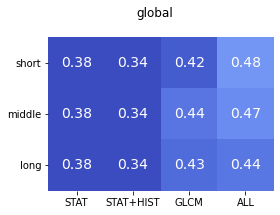

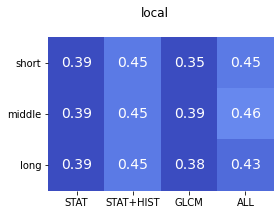

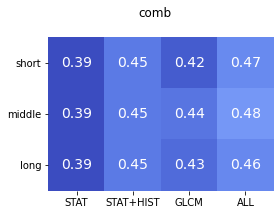

In [86]:
name = 'global_R'
plot(name, 'result', 'global')
name = 'local_R'
plot(name, 'result', 'local')
name = 'comb_R'
plot(name, 'result', 'comb')

# NDVI

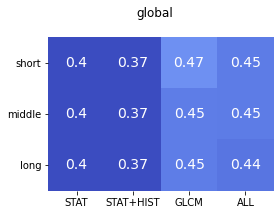

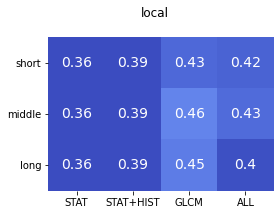

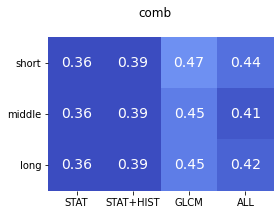

In [83]:
name = 'global_ndvi'
plot(name, 'result', 'global')
name = 'local_ndvi'
plot(name, 'result', 'local')
name = 'comb_ndvi'
plot(name, 'result', 'comb')

# DETECT

## RED

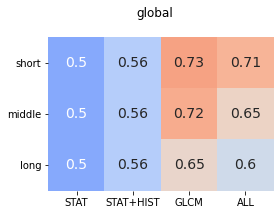

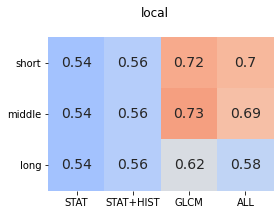

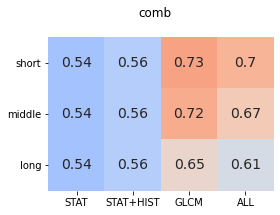

In [84]:
name = 'global_R'
plot(name, 'result_detect', 'global')
name = 'local_R'
plot(name, 'result_detect', 'local')
name = 'comb_R'
plot(name, 'result_detect', 'comb')

## NDVI

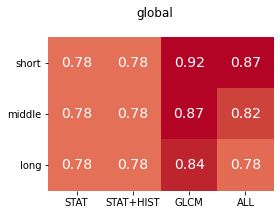

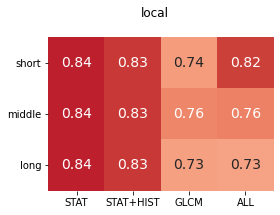

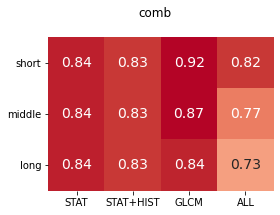

In [85]:
name = 'global_ndvi'
plot(name, 'result_detect', 'global')
name = 'local_ndvi'
plot(name, 'result_detect', 'local')
name = 'comb_ndvi'
plot(name, 'result_detect', 'comb')

# Confusion matrix

In [ ]:
SVM,  на local full и  SVM,  на local full

Text(248.66666666666666, 0.5, 'Действительные метки')

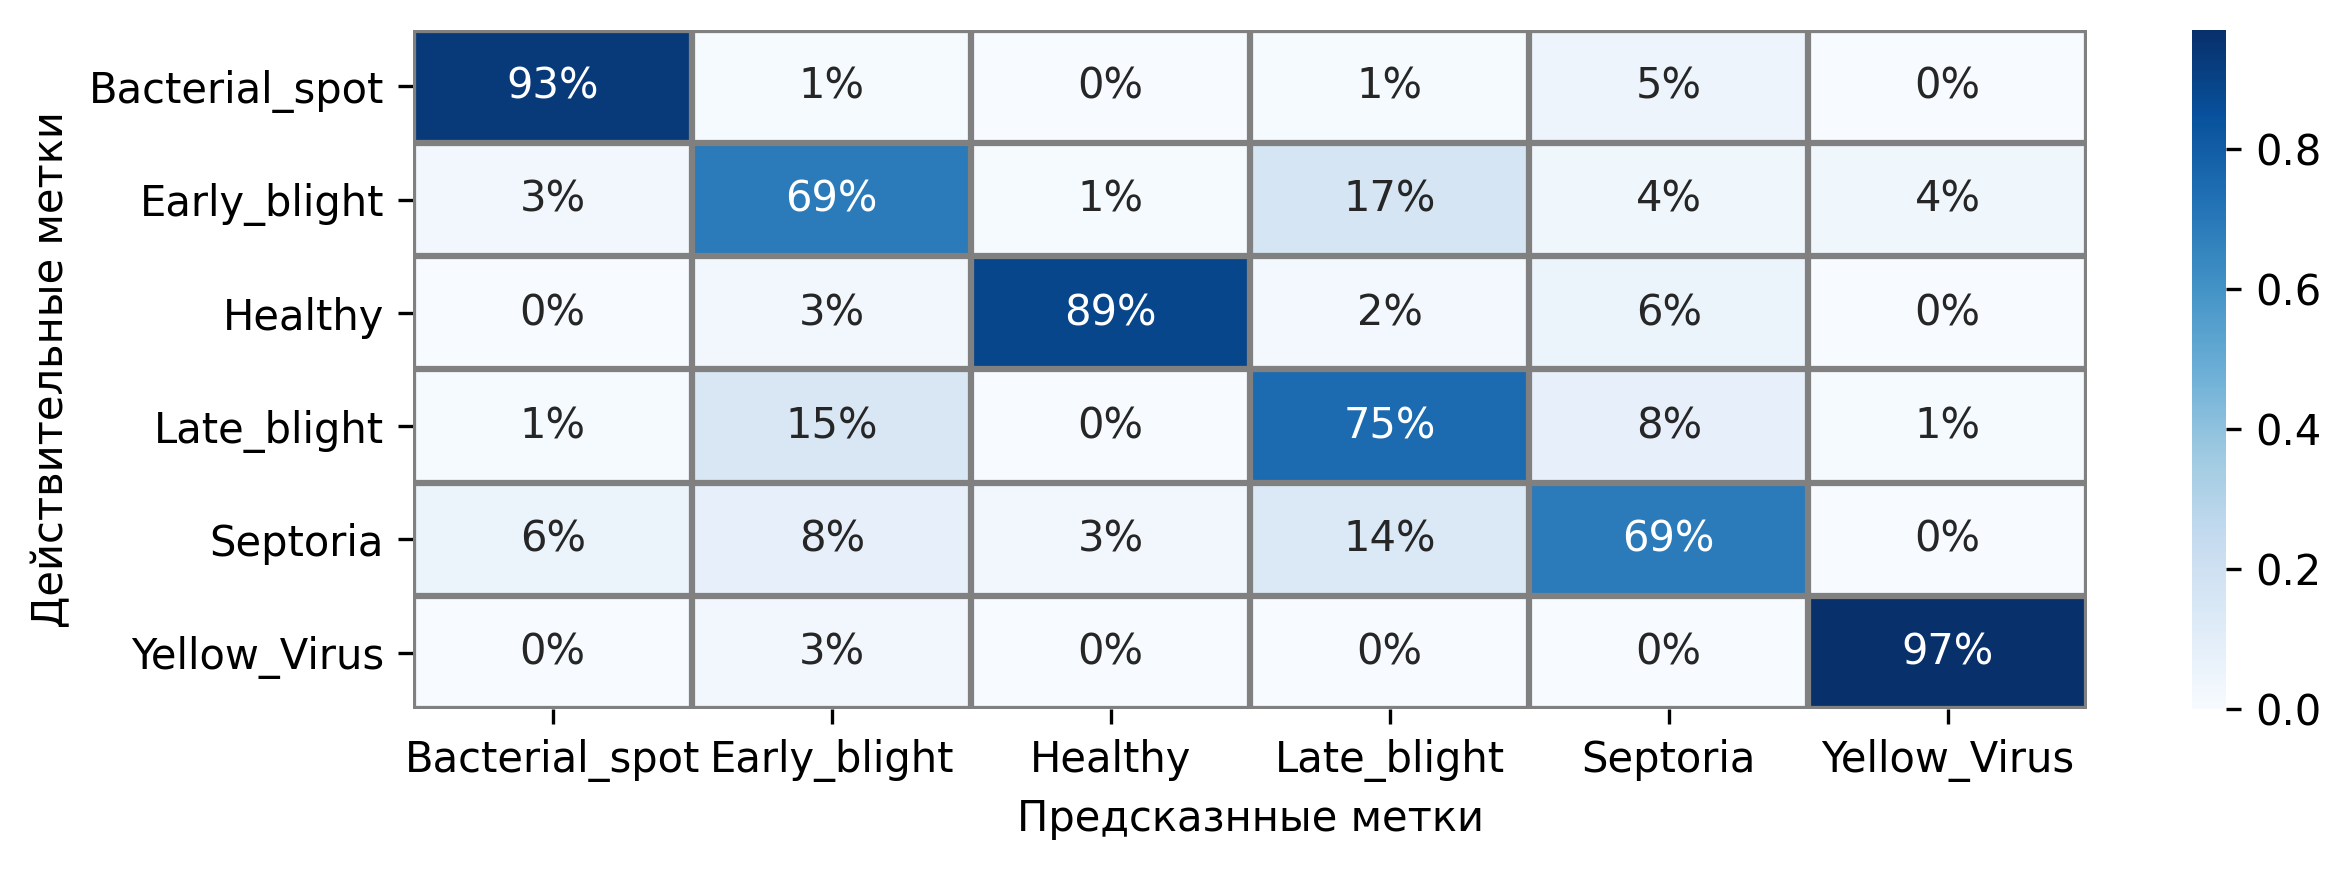

In [8]:
data = torch.load("..\\data\\test_predict\\SLPClassifer_comb_R.pth")
data['prediction'].shape, data['y'].shape
cm = confusion_matrix(data['y'], data['prediction'])
cm = cm / np.sum(cm, axis=1)
cm = np.round(cm, 2)
name = ["Bacterial_spot", "Early_blight", "Healthy", "Late_blight", "Septoria", "Yellow_Virus"]
df_cm = pd.DataFrame(cm, index = name, columns = name)
plt.figure(figsize = (9,3), dpi=300)
sns.heatmap(df_cm, annot=True, fmt='.0%', cmap='Blues')
[plt.hlines(np.arange(len(name)+1), *plt.xlim(), color='grey')]
[plt.vlines(np.arange(len(name)+1), *plt.ylim(), color='grey')]
plt.xlabel('Предсказнные метки')
plt.ylabel('Действительные метки')

Text(248.66666666666666, 0.5, 'Действительные метки')

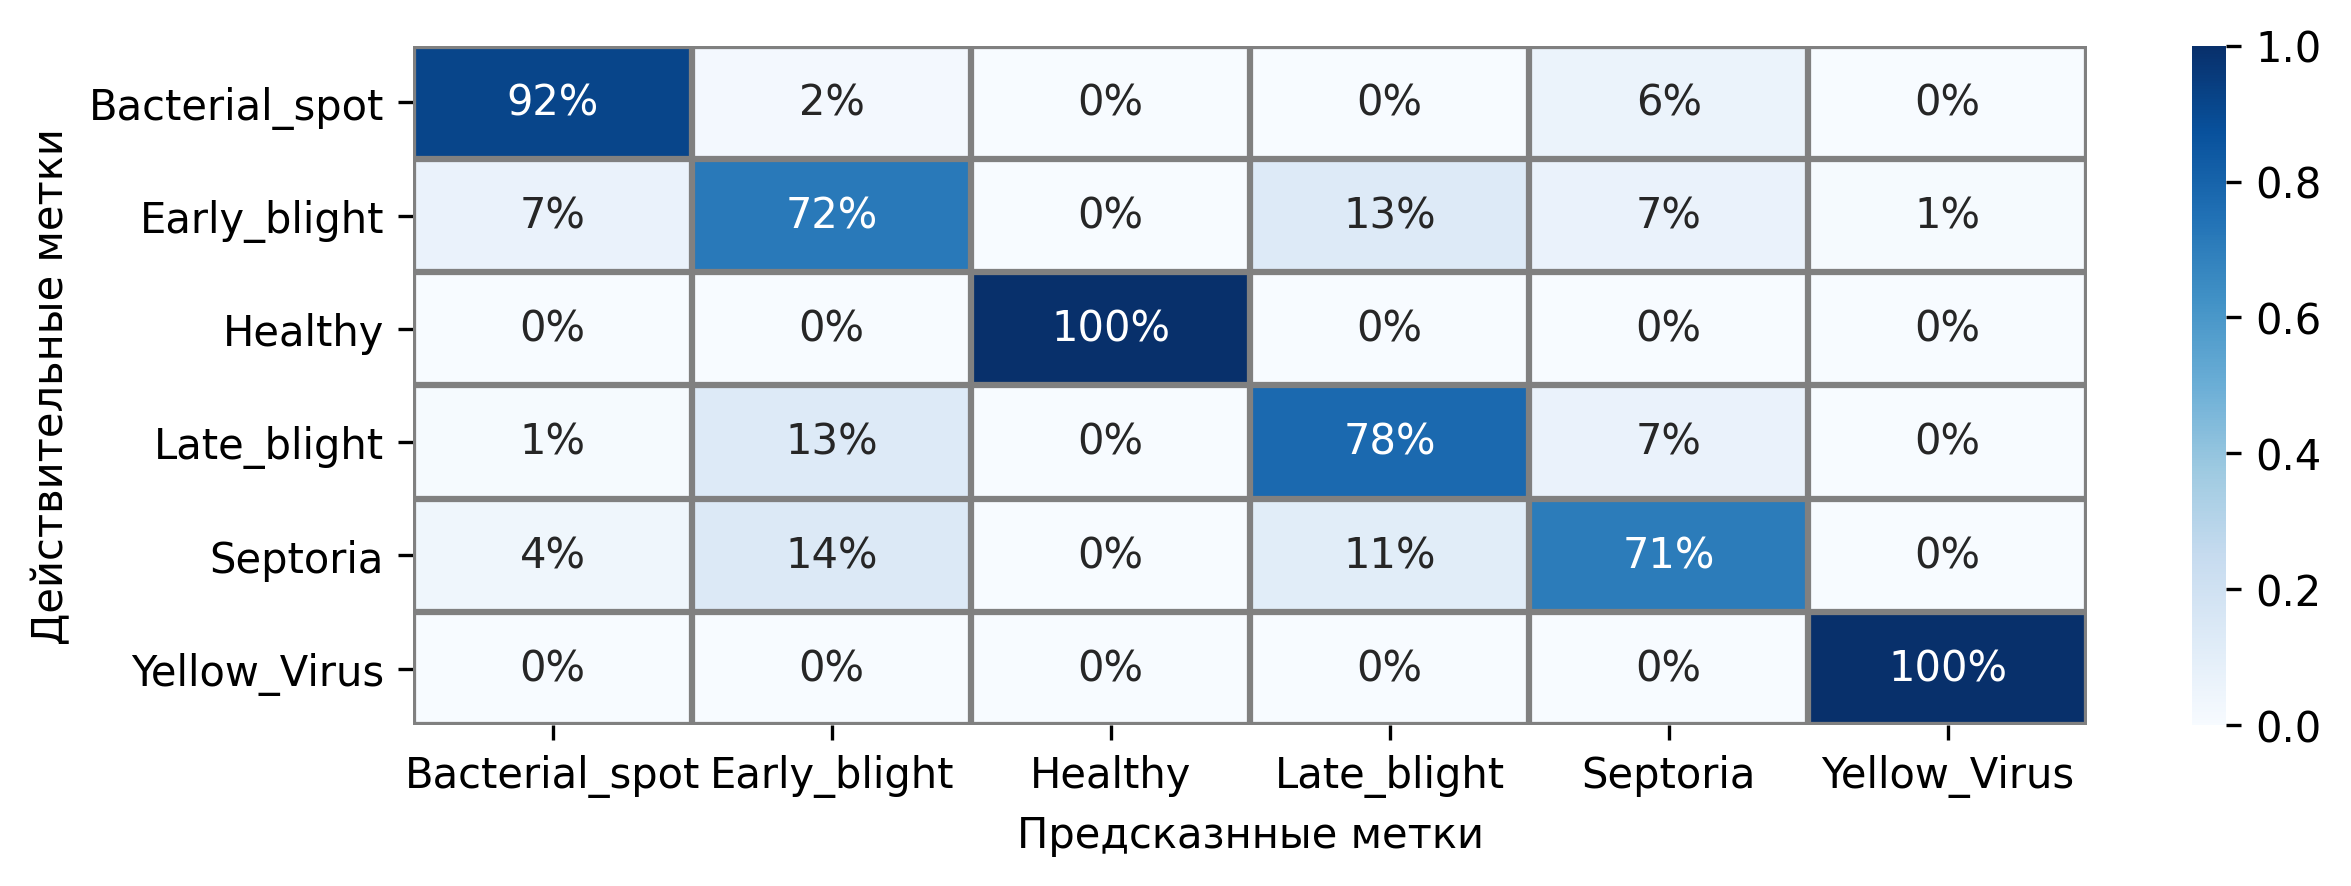

In [9]:
data = torch.load("..\\data\\test_predict\\SVC_comb_ndvi.pth")
data['prediction'].shape, data['y'].shape
cm = confusion_matrix(data['y'], data['prediction'])
cm = cm / np.sum(cm, axis=1)
cm = np.round(cm, 2)
name = ["Bacterial_spot", "Early_blight", "Healthy", "Late_blight", "Septoria", "Yellow_Virus"]
df_cm = pd.DataFrame(cm, index = name, columns = name)
plt.figure(figsize = (9,3), dpi=300)
sns.heatmap(df_cm, annot=True, fmt='.0%', cmap='Blues')
[plt.hlines(np.arange(len(name)+1), *plt.xlim(), color='grey')]
[plt.vlines(np.arange(len(name)+1), *plt.ylim(), color='grey')]
plt.xlabel('Предсказнные метки')
plt.ylabel('Действительные метки')